## SML Assessment

Instructions

Make a copy of this notebook.

Rename the notebook to your_name - SML Quiz.

You may work in groups and ask me any questions. You may also refer to the course materials, the internet and any resources you encounter. Discussions are welcomed, but you have to submit an individual answer notebook.

### This is your assessment project for this course.

You are given the following real estate transaction data.

Use all the tools that you have learnt in
1. Feature engineering
2. Data preprocessing
3. Model selection and evaluation
4. Performance tuning

**to predict the price per sqm** of the housing units.

### You need to do the following to pass this assessment:
#### Model Exploration
1. Perform a summary statistical analysis of the dataset and create hypothesis (wild guesses)
> Write your analysis in a text box after your codes.

#### Model Evaluation and Selection
1. Perform model selection on the base dataset
2. Include a linear regressor
3. Include a decision tree regressor
4. Include an ensemble model
5. Perform feature engineering, preprocessing, and fine-tuning so that you can improve your results. **Aim for MAPE of 5% or less.**
6. Report your results on the test data.
> Write your approach and any learning points/insights you have gathered during this development phase
>
> Write these in a text box after your codes


#### Model Explanation
1. Perform statistical and feature importance plots of a linear regression vs your chosen model
2. Contrast the difference in the important features computed by the linear regression vs your chosen model, which one makes more sense?
3. At the same time, explain the intuition between the chosen features and what goes on in a consumer's mind in reality.
> Write your analysis in a text box after each plot or after all the plots

#### Model saving for deployment
1. Save your model and use an f-string to automate today's date in the file name.

#### Additional materials during walkthough (not required for assessment)
> New ensemble methods: Stacking and Blending
>
> Conduct hyperparameter tuning
>
> Perform additional analysis.
>
> Create an API environment in colab to test your predictive modelling service.


### Connect Google Drive to Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Enable GPU acceleration

Click the _Runtime_ dropdown at the top of the page, then _Change Runtime Type_ and confirm the instance type is _GPU_.

Check the output of `!nvidia-smi` to make sure you've been allocated a Tesla T4, P4, or P100.

In [2]:
# Check GPU
!nvidia-smi

/bin/bash: nvidia-smi: command not found


Setup:
This set up script:

1. Checks to make sure that the GPU is RAPIDS compatible
1. Installs the **current stable version** of RAPIDSAI's core libraries using pip, which are:
  1. cuDF
  1. cuML
  1. cuGraph
  1. xgboost

**This will complete in about 3-4 minutes**

Please use the [RAPIDS Conda Colab Template notebook](https://colab.research.google.com/drive/1TAAi_szMfWqRfHVfjGSqnGVLr_ztzUM9) if you need to install any of RAPIDS Extended libraries, such as:
- cuSpatial
- cuSignal
- cuxFilter
- cuCIM

OR
- nightly versions of any library


In [3]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py


Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 2.19 MiB/s, done.
Resolving deltas: 100% (191/191), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.8 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pynvml/nvml.py", line 1798, in _LoadNvmlLibrary
    nvmlLib = CDLL("libnvidia-ml.so.1")
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: libnvidia-ml.so.1: cannot open shared object file: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/pip-install.py", line 17, in <module>
    pynvml.nvm

In [4]:
# The lightgbm version installed in colab is CPU
# We need to uninstall it first:
!pip3 uninstall lightgbm -y

# to re-install the GPU version
!pip3 install lightgbm --config-settings=cmake.define.USE_GPU=ON

Found existing installation: lightgbm 3.3.5
Uninstalling lightgbm-3.3.5:
  Successfully uninstalled lightgbm-3.3.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.4 MB/s eta 0:00:00


### Solution starts here

In [5]:
# Install the additional packages
!pip3 install -U ydata_profiling pycaret[full] Pillow
!pip install --upgrade Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

ERROR: Operation cancelled by user


In [1]:
import os
import pickle
import pandas as pd
import numpy as np
from pathlib import Path
from ydata_profiling import ProfileReport

In [2]:
# Load data
data_path = Path('/content/drive/My Drive/pcml_data/5SML')
filename = 'housing_transactions.csv'

df = pd.read_csv(data_path / filename)

Explore your data

In [3]:
# Use profiling for exploratory analysis
df.profile_report()

Output hidden; open in https://colab.research.google.com to view.

Basic data cleaning and feature engineering

Some suggestions:
1. Date-type variables should be converted into something that measures the distance of time or numeric
> * year, month, day, weekday
>
> * number of days from a common reference date

2. Location variables should be properly considered in conjunction with the models that you think are going to be top choices.
> * use the postal_lat_lon.csv in the same folder

3. Freehold properties on average have a 20% higher selling price over leasehold properties, at new sale. Over time, this premium will fall to about 7% after 10 years. How do you separate freehold from leasehold?

4. Some transactions are enbloc or bulk purchases. Such transactions should not be included as they usually have a different consideration. How do you identify such transactions and drop them?

5. Landed properties are only restricted to residents and thus have a different consideration. How do you drop them?

In [4]:
# In python, we name features/variables using the area_sqm convention.
# In Java/Javascript, we name them using the CamelCase convention areaSqm
# Note that the CamelCase in Python is reserved for creating Classes (Objects)

# Create a data map using dictionary method
# Here, the original label is the key, and the new label is the value

label_rename_map = {
    'Project Name': 'project_name',
    'Address': 'address',
    'No. of Units': 'no_of_units',
    'Area (sqm)': 'area_sqm',
    'Type of Area': 'type_of_area',
    'Transacted Price ($)': 'transacted_price',
    'Nett Price($)': 'nett_price',
    'Unit Price ($ psm)': 'price_psm',
    'Unit Price ($ psf)': 'price_psf',
    'Sale Date': 'sale_date',
    'Property Type': 'property_type',
    'Tenure': 'tenure',
    'Completion Date': 'completion_date',
    'Type of Sale': 'type_of_sale',
    'Purchaser Address Indicator': 'purchaser_address_indicator',
    'Postal District': 'postal_district',
    'Postal Sector': 'postal_sector',
    'Postal Code': 'postal_code',
    'Planning Region': 'planning_region',
    'Planning Area': 'planning_area'
}

In [5]:
# Apply the data map to change the label names of the dataframe
df.rename(label_rename_map, axis = 1, inplace = True)

In [6]:
# Check that the labels have been properly renamed
df.columns

Index(['project_name', 'address', 'no_of_units', 'area_sqm', 'type_of_area',
       'transacted_price', 'nett_price', 'price_psm', 'price_psf', 'sale_date',
       'property_type', 'tenure', 'completion_date', 'type_of_sale',
       'purchaser_address_indicator', 'postal_district', 'postal_sector',
       'postal_code', 'planning_region', 'planning_area'],
      dtype='object')

### Step 2: Data cleaning and feature creation

In [7]:
# Enbloc and block purchases do not accurately reflect the price that most
# purchasers face, thus we should remove observations with no_of_units more than 1
df = df[df['no_of_units'] == 1]

In [8]:
# Remove landed properties since their purchase is restricted to residents,
# while foreigners can still buy condominiums.
df = df[df['property_type'].isin(['Condominium', 'Apartment', 'Executive Condominium'])]

In [9]:
# Remove Unknown in completion date and set the year to 2023 for Uncompleted
df = df[df['completion_date'] != 'Unknown']

In [10]:
# All uncompleted units will have its year set to 2023
df['completion_date'] = df['completion_date'].apply(
    lambda x: 2023 if not x[0].isdigit() else int(x)
)

In [11]:
# Convert sale date to a proper datetime form
df['sale_date'] = df['sale_date'].apply(pd.to_datetime)

In [12]:
# (Optional for assessement)
# Create a reference date, where the earliest date in the dataset is 0 and each
# subsequent date increases by 1

# This will allow decision trees to group observations by dates in a very fine
# manner - Trend capturing.

# First get a de-duplicated list of sale date
# ## Then sort them
# ## Then create a incremental date using i += 1 for each consecutive date
dates = sorted(df['sale_date'].drop_duplicates())

date_dict = {}
i = 0
for date in dates:
    date_dict[date] = i
    i += 1

In [14]:
# (Optional for assessement)
# Apply the date dictionary to the dataframe and call this date feature date_id.
df['date_id'] = df['sale_date'].apply(lambda x : date_dict[x])

In [ ]:
# Create leasehold/freehold dummy
# First, check what are the various tenures in the dataset
df['tenure'].apply(lambda x : x.split(' ')[0]).value_counts()

99          29373
Freehold    11097
999           989
956           106
103            70
946            30
929            23
110            17
947            13
102             9
9999            6
89              3
N.A.            2
Name: tenure, dtype: int64

In [15]:
# create leasehold dummy feature
def is_leasehold(x):
    tenure = x.split(' ')[0]
    if tenure in ['Freehold', 'N.A.']:
        return 0
    elif int(tenure) <= 99:
        return 1
    else:
        return 0

df['is_leasehold'] = df['tenure'].apply(is_leasehold)

In [16]:
# Merge lat/lon data to postal code
# First, read the postal code - lat/lon dataset
postal_lat_lon = pd.read_csv(data_path / 'postal_lat_lon.csv')

In [17]:
# Merge lat lon to main dataset via postal codes
df = pd.merge(df, postal_lat_lon, on='postal_code', how='left')

In [18]:
# Also remove missing values
df.dropna(inplace = True)

In [19]:
# Do a final check on the summary statistics
df.profile_report(minimal = True)

Output hidden; open in https://colab.research.google.com to view.

### Step 3: Model Evaluation and Selection







In [20]:
# Import Pycaret's regression module
from pycaret.regression import RegressionExperiment

Features that we need to ignore:
1. No. of units - since all the values are 1 after cleaning.
2. Project Name - too unique and we already have lat lon.
3. Address - same as above.
4. Transacted Price - This is the answer, price_psf = transacted_price / area_sqm. Price is something we want to predict, so this feature cannot be inside.
5. Nett Price - same as above.
6. Price psm - choose either this or price_psf.
7. Tenure - we already used it to compute is_leasehold
8. Postal Code - we already used it to get lat lon.

Additional date features
PyCaret setup has an argument that will create year, month, day features for
dates. This argument is called date_features.

In [21]:
# Setup modeling run with PyCaret
reg_exp = RegressionExperiment()

reg_exp.setup(
    data = df,
    target = 'price_psf',
    normalize = True,
    date_features = ['sale_date'],
    #categorical_features=['postal_district', 'postal_sector', 'completion_date'],
    ignore_features = ['project_name', 'address', 'no_of_units', 'transacted_price', 'nett_price', 'price_psm', 'tenure', 'postal_code'],
)

,Description,Value
0,Session id,4424
1,Target,price_psf
2,Target type,Regression
3,Original data shape,"(41703, 24)"
4,Transformed data shape,"(41703, 28)"
5,Transformed train set shape,"(29192, 28)"
6,Transformed test set shape,"(12511, 28)"
7,Ignore features,8
8,Ordinal features,1
9,Numeric features,8


### Step 4: Check which models perform the best

To check which models have GPU support, run models() with additional arguments like this:

`models(internal=True)[['Name', 'Turbo', 'GPU Enabled']]`

else this will work too:
`models()`

In [22]:
# What are the models that are available?
reg_exp.models(internal = True)[['Name', 'Turbo', 'GPU Enabled']]

,Name,Turbo,GPU Enabled
ID,,,
lr,Linear Regression,True,False
lasso,Lasso Regression,True,False
ridge,Ridge Regression,True,False
en,Elastic Net,True,False
lar,Least Angle Regression,True,False
llar,Lasso Least Angle Regression,True,False
omp,Orthogonal Matching Pursuit,True,False
br,Bayesian Ridge,True,False
ard,Automatic Relevance Determination,False,False


Use exclude or include to control what models will be trained.


```
compare_models(exclude=['tr', 'ransac', 'lar', 'huber', 'svm', 'et', 'ada'])

compare_models(include=['rf', 'xgboost', 'lightgbm', 'dt', 'br', 'lasso', 'catboost', 'knn', 'lr'])
```



In [23]:
# Choose one of the above lines and code and execute here
reg_exp.compare_models(include = ['rf', 'xgboost', 'lightgbm', 'dt', 'br', 'catboost', 'knn', 'lr'], sort = 'MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,61.0292,9793.1521,98.9432,0.9620,0.0661,0.0446,21.8190
xgboost,Extreme Gradient Boosting,69.1064,11346.0028,106.4571,0.9560,0.0721,0.0506,5.5750
catboost,CatBoost Regressor,71.1707,11760.7865,108.4142,0.9544,0.0725,0.0519,10.8650
dt,Decision Tree Regressor,78.8075,17252.3985,131.2967,0.9329,0.0889,0.0576,0.8600
lightgbm,Light Gradient Boosting Machine,79.3430,14050.0898,118.5045,0.9455,0.0801,0.0582,1.6520
knn,K Neighbors Regressor,119.3464,38435.0496,195.8768,0.8512,0.1236,0.0852,1.6110
br,Bayesian Ridge,166.4598,58910.0030,242.6224,0.7718,0.1668,0.1222,0.9580
lr,Linear Regression,166.4423,58911.2172,242.6249,0.7718,0.1668,0.1222,0.4610


Processing:   0%|          | 0/37 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=4424)

Let's now create a model with the best results.


In [24]:
# Create a model object with the best model
best_model = reg_exp.create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,62.6662,10336.6812,101.6695,0.9625,0.0686,0.0459
1,61.4965,9885.2430,99.4246,0.9621,0.0671,0.0453
2,58.7729,9475.3370,97.3413,0.9628,0.0642,0.0432
3,62.4562,10028.2160,100.1410,0.9637,0.0672,0.0452
4,61.7548,9632.9030,98.1474,0.9638,0.0666,0.0451
5,61.8852,9458.2204,97.2534,0.9628,0.0659,0.0449
6,61.0549,9485.1129,97.3915,0.9613,0.0665,0.0445
7,61.1052,10341.9731,101.6955,0.9590,0.0666,0.0444
8,59.6963,10027.7413,100.1386,0.9613,0.0650,0.0436


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [25]:
# We will also choose a few more models that perform well but not of the same class if possible.
ctb = reg_exp.create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,72.9499,13031.7760,114.1568,0.9527,0.0762,0.0531
1,71.4870,12463.4049,111.6396,0.9522,0.0736,0.0522
2,69.8202,11988.0184,109.4898,0.9530,0.0721,0.0511
3,72.7826,11946.0232,109.2979,0.9567,0.0726,0.0523
4,70.9930,11186.9856,105.7685,0.9580,0.0724,0.0519
5,71.9120,11634.7890,107.8647,0.9542,0.0728,0.0519
6,72.5054,11347.6743,106.5255,0.9537,0.0725,0.0529
7,70.6333,11683.5710,108.0906,0.9537,0.0716,0.0513
8,69.2155,11158.4678,105.6336,0.9569,0.0705,0.0507


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
lgb = reg_exp.create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,80.9289,14867.1277,121.9308,0.9460,0.0829,0.0595
1,79.7234,14617.3721,120.9023,0.9439,0.0809,0.0584
2,77.6262,14201.4816,119.1700,0.9443,0.0792,0.0570
3,81.3187,14595.4368,120.8116,0.9471,0.0814,0.0590
4,78.7937,13405.8082,115.7835,0.9496,0.0797,0.0580
5,78.8636,13516.0931,116.2587,0.9468,0.0795,0.0572
6,80.4996,13819.2384,117.5553,0.9437,0.0803,0.0589
7,80.3629,14783.0215,121.5854,0.9414,0.0802,0.0586
8,78.0923,13671.5496,116.9254,0.9472,0.0784,0.0574


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
knn = reg_exp.create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,125.8708,44317.1022,210.5163,0.8391,0.1317,0.0898
1,118.6977,39191.0729,197.9674,0.8496,0.1230,0.0844
2,119.0804,41712.2548,204.2358,0.8363,0.1270,0.0857
3,123.2370,42271.9333,205.6014,0.8469,0.1278,0.0869
4,117.5755,36236.5278,190.3589,0.8639,0.1205,0.0839
5,119.0623,36261.4359,190.4244,0.8572,0.1217,0.0848
6,120.6217,37489.5817,193.6223,0.8471,0.1248,0.0860
7,119.0440,38211.0039,195.4764,0.8484,0.1231,0.0844
8,116.5398,34416.4441,185.5167,0.8670,0.1190,0.0833


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Stacking and Blending ensemble (Optional for Assessment - will cover during walkthrough)

Will a stacked model give better performance?

Stacking and blending works like this:
1. Blending blends multiple models and uses part of the validation data to train the next layer.
2. Stacking uses a model (meta-model) to select how much of each contributing model's results to rely on.
> Eg. we have a xgboost, catboost, and rf. Each of them predicts the results. This goes into the estimator_list argument.
>
> Then we choose a model (can be any models from lr to rf) and it will fit the
> predicted results to the actual results. This meta model will choose various weights on each of the first set of models that gives the best final accuracy. This goes into the meta_model argument.

In [ ]:
# Caution: This takes a long time to run even with a GPU.
# Note that the blended ensemble has better MAPE than our best model.

blended_model = reg_exp.blend_models(
    estimator_list = [best_model, ctb, knn],
    choose_better = True,
    optimize = 'MAPE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,96.0204,22357.2405,149.5234,0.9138,0.0962,0.0698
1,98.9509,21661.1175,147.1772,0.9175,0.0976,0.0714
2,97.4562,21808.8991,147.6784,0.9157,0.0965,0.0701
3,93.6576,20521.1301,143.2520,0.9169,0.0924,0.0669
4,99.0274,22784.7033,150.9460,0.9132,0.0954,0.0695
5,99.3674,24317.9916,155.9423,0.9072,0.0983,0.0709
6,94.8684,20892.2179,144.5414,0.9205,0.0934,0.0680
7,93.8913,19887.6688,141.0236,0.9183,0.0911,0.0677
8,98.3709,22777.1665,150.9211,0.9132,0.1002,0.0722


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Caution: This takes a long time to run even with a GPU.
# Note that the stacked ensemble has worse MAPE than
# both our best model and blended ensemble.

stacked_model = reg_exp.stack_models(
    estimator_list = [best_model, ctb, knn],
    meta_model = best_model,
    choose_better = True,
    optimize = 'MAPE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,102.0454,23265.8412,152.5314,0.9103,0.0998,0.0745
1,101.3956,22168.7498,148.8917,0.9156,0.0982,0.0728
2,106.7257,25562.2622,159.8820,0.9012,0.1032,0.0764
3,99.6931,23009.4459,151.6886,0.9068,0.0983,0.0714
4,103.5092,24224.5290,155.6423,0.9078,0.0986,0.0726
5,106.4370,25973.0114,161.1614,0.9009,0.1027,0.0757
6,101.8919,23732.3185,154.0530,0.9097,0.0988,0.0731
7,101.3767,22366.5241,149.5544,0.9081,0.0971,0.0729
8,103.6860,24156.8381,155.4247,0.9080,0.1030,0.0756


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the stacked model, hence it will be returned. NOTE: The display metrics are for the stacked model (not the original one).


### Test on unseen data
Always test the accuracy on the final test data (unseen data)!

In [28]:
# Use the test data to check predictive accuracy on unseen data
test_result = reg_exp.predict_model(best_model)

# Compute the MAPD for the selected model
mapd = np.median(abs(test_result.price_psf - test_result['prediction_label']) / test_result.price_psf)
print(f'The Median Absolute % Deviation is {mapd * 100:.2f}%.')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,59.4530,9380.1297,96.8511,0.9629,0.0641,0.0432


The Median Absolute % Deviation is 2.83%.


In [29]:
# Use the test data to check predictive accuracy on unseen data
test_result = reg_exp.predict_model(best_model)

# Compute the MAPD for the selected model
mapd = np.median(abs(test_result.price_psf - test_result['prediction_label']) / test_result.price_psf)
print(f'The Median Absolute % Deviation is {mapd * 100:.2f}%.')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,59.4530,9380.1297,96.8511,0.9629,0.0641,0.0432


The Median Absolute % Deviation is 2.83%.


### Additional analysis (Optional for Assessment - will cover during walkthrough)

We will always go with the best model when we don't have time constraints.

In [30]:
# Ensure that the notebook can plot inline
%matplotlib inline

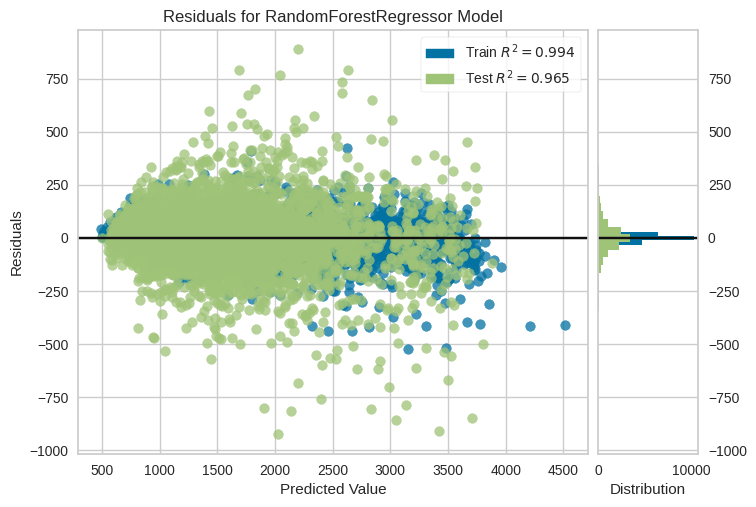

In [ ]:
# Residual plots
reg_exp.plot_model(best_model, plot = 'residuals')

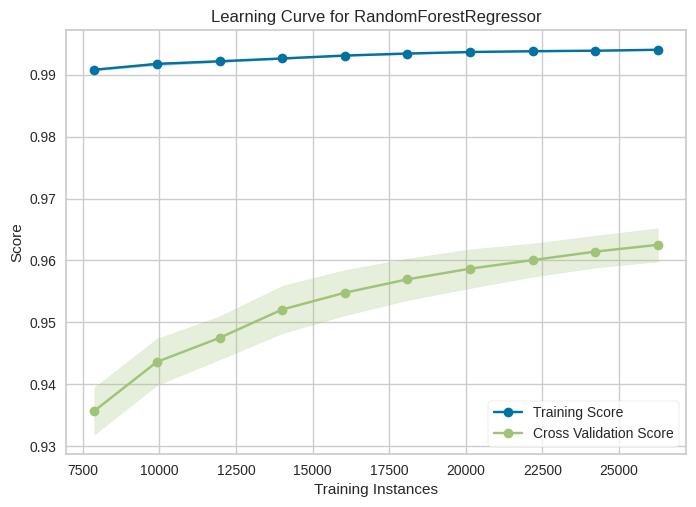

In [ ]:
# Learning curve
reg_exp.plot_model(best_model, plot = 'learning')

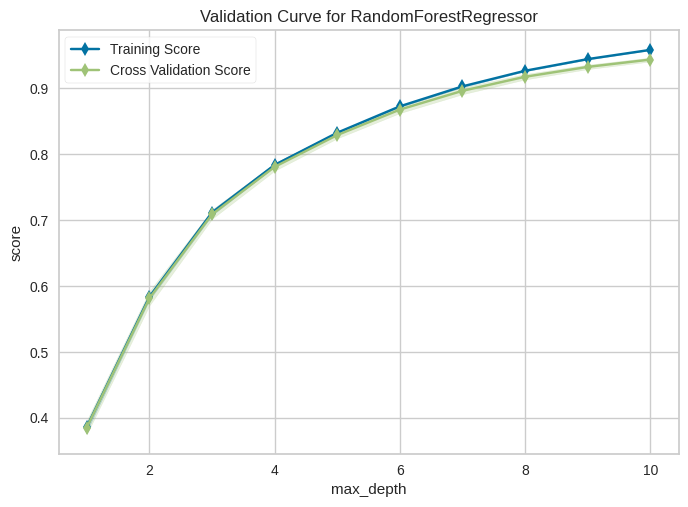

In [ ]:
# Validation curve
reg_exp.plot_model(best_model, plot = 'vc')

In [ ]:
# See other plots
reg_exp.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Explain the model

After we have the best model, we need to explain why the model is accurate in order to convince human management that our results did not come from a black box.

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,174.5977,66001.8181,256.9082,0.7604,0.1797,0.1283
1,166.2472,58219.1174,241.2864,0.7765,0.1698,0.1230
2,165.9550,59573.9493,244.0778,0.7662,0.1666,0.1229
3,167.8516,61552.9621,248.0987,0.7770,0.1640,0.1209
4,168.8937,61228.0697,247.4431,0.7700,0.1696,0.1240
5,164.6365,56605.5960,237.9193,0.7771,0.1599,0.1186
6,165.2855,57512.2061,239.8170,0.7655,0.1643,0.1212
7,162.4805,56695.8382,238.1089,0.7751,0.1638,0.1189
8,167.8425,58278.3332,241.4091,0.7749,0.1620,0.1222


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

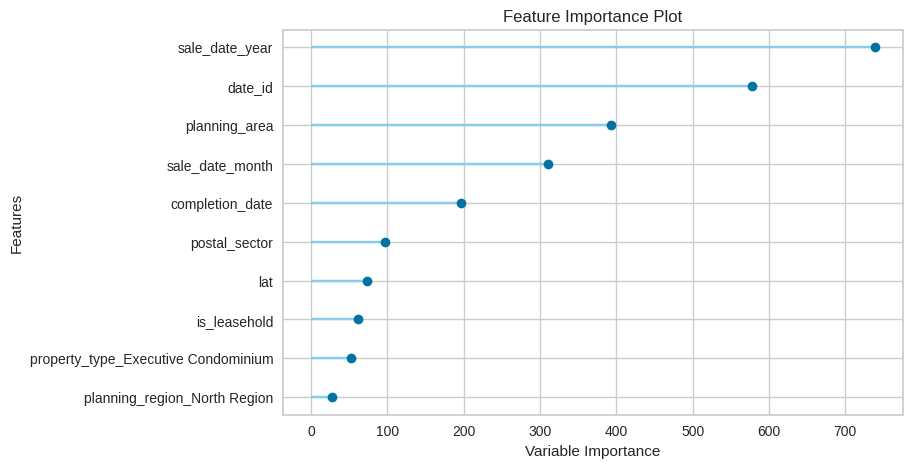

In [31]:
# Create a linear regression model
lr = reg_exp.create_model('lr')

# Plot the feature importance of the linear regression
reg_exp.plot_model(lr, plot = 'feature')

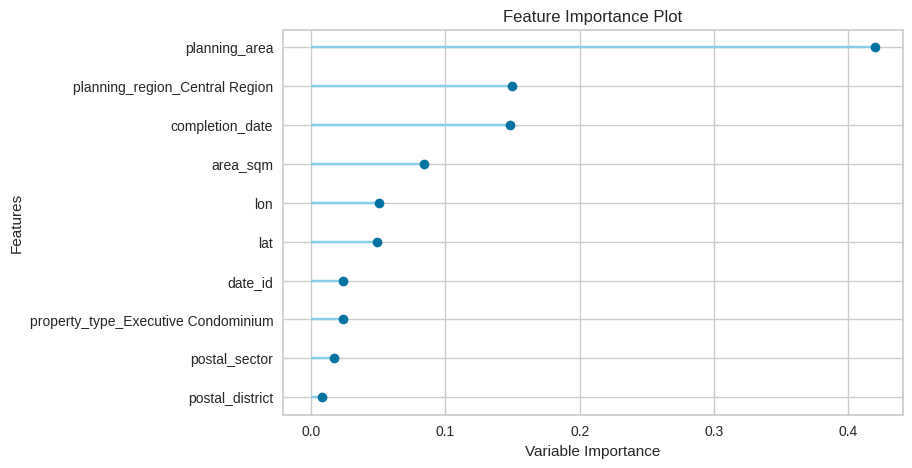

In [32]:
# Compare the above feature importance plot with the best model you have chosen
reg_exp.plot_model(best_model, plot = 'feature')

In [ ]:
# takes too long.  forget it.

# Plot a SHAP interpretation of the model
# reg_exp.interpret_model(best_model)

### Hyperparameter Tuning (Optional for assessment - Will cover during walkthrough)
We can tune the model to squeeze a bit more accuracy out of the best model if we want.


In [ ]:
# Perform hyperparameter tuning (This will take a long time.)
# We managed to squeeze some performance out of the best model

tuned_model = reg_exp.tune_model(
    best_model,
    choose_better = True,
    search_library = 'optuna',
    n_iter = 100,
    optimize = 'MAPE',
    early_stopping = True
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,94.6564,21418.5275,146.3507,0.9174,0.0936,0.0687
1,96.0657,19644.7461,140.1597,0.9252,0.0940,0.0698
2,96.1020,20921.7527,144.6435,0.9191,0.0948,0.0691
3,92.5129,20114.5807,141.8259,0.9185,0.0902,0.0657
4,95.8898,20352.4217,142.6619,0.9225,0.0920,0.0678
5,97.7261,22862.2508,151.2027,0.9128,0.0955,0.0699
6,94.0489,20366.2480,142.7104,0.9225,0.0921,0.0676
7,94.3849,19836.5504,140.8423,0.9185,0.0904,0.0678
8,95.6332,21107.1704,145.2831,0.9196,0.0958,0.0698


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2023-04-01 08:37:29,416] Searching the best hyperparameters using 29192 samples...
[I 2023-04-01 08:56:29,571] Finished hyperparemeter search!


### Finalize model

In [33]:
# Retrain the model using 100% of the data
final_model = reg_exp.finalize_model(best_model)

### Save the model
We can save the trained model into a file, pass it to the software engineer to integrate into the solution.

In [34]:
# Get today's date
from datetime import datetime

current_dt = datetime.now()

In [38]:
# Save your chosen model using f-string with today's date
model_filepath = data_path / f'autovaluation_tuned_{current_dt}'
reg_exp.save_model(final_model, model_name = model_filepath)

How do we use the model?

The model can spit out a high accuracy prediction using the features that it has been trained with.

Thus, we need to fit the model with the same features in order for it to generate a prediction.

### Test Model Deployment (Optional for Assessment - will cover during walkthrough)
There are 3 popular python webservices:
1. Django - Monolithic, very stable, but slower than the other 2. Slower is relative, it is still fast enough to support the most demanding workloads today.
2. Flask - Microservice, fast, super easy to code but not as stable in scaled production. We use this for quick testing.
3. FastAPI - My weapon of choice. Its very fast (even faster than node.js) and stable under scaled production.

My recommendation if you want to learn about webservice:
1. Start with Django. This will give you the proper foundation and also, Django is the oldest out of the 3 and extremely well-supported by the community. The components in Django are most complete.
2. After that, learn FastAPI. FastAPI is very easy to code but its data support layer is not as easy as Django. Personally, I use Django to manage the data communication within my webservice and FastAPI to focus on serving the frontend.

For API testing in Jupyter, we have a convenient package called flask-ngrok, which we will use in this section. It will create a webservice from your jupyter notebook.

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
!tar -xvf /content/ngrok-stable-linux-amd64.tgz
!./ngrok authtoken 2MCu3Zd1FTRacdK3YmhoJmOhiVi_4Vojd36H9KvFXNC3xhmRo

In [ ]:
!pip3 install -U flask flask-ngrok

In [ ]:
# Load the model as your software engineer would.
model_filepath = data_path / f'autovaluation_tuned_{current_dt}'
latest_model = reg_exp.load_model(model_filepath)

The codes below creates a webserver with your model loaded.

A webserver once started (line 20: app.run()) will remain active and 'listen' for requests.
> Since we are sending data inputs to the models for a prediction, and the inputs can be very long or sensitve, we use a POST request.
>
> See line 14 below. The data input to the webserver is retrieved by request.get_json, which converts json into python dictionary.
>
> We then create a pandas dataframe from the python dictionary in line 15.
>
> Then we feed this input into the pycaret model for scoring, using the function predict_model(). This is line 16.
>
> The results is then returned to the webserver, which will send this back to the user.

In [ ]:
import os
import pandas as pd
from pycaret.regression import RegressionExperiment

from flask_ngrok import run_with_ngrok
from flask import Flask, request

app = Flask(__name__)
run_with_ngrok(app)

reg_exp = RegressionExperiment()

model_filepath = data_path / f'autovaluation_tuned_{current_dt}'
latest_model = reg_exp.load_model(model_filepath)

@app.route('/', methods=['GET', 'POST'])
def scoring():
    if request.method == 'POST':
        data = request.get_json(silent=True)
        df = pd.DataFrame([data])
        df['sale_date'] = df.sale_date.apply(pd.to_datetime)
        predicted_value = reg_exp.predict_model(latest_model, data=df)
        return f"The predicted value for this property is S${predicted_value['prediction_label'].iloc[0]:.2f}."
    else:
        return f"Please use a POST method."

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://62cf-35-226-133-18.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [01/Apr/2023 09:54:21] "POST / HTTP/1.1" 200 -


INFO:werkzeug:127.0.0.1 - - [01/Apr/2023 09:55:20] "POST / HTTP/1.1" 200 -


INFO:werkzeug:127.0.0.1 - - [01/Apr/2023 09:55:32] "POST / HTTP/1.1" 200 -


INFO:werkzeug:127.0.0.1 - - [01/Apr/2023 09:56:06] "POST / HTTP/1.1" 200 -


INFO:werkzeug:127.0.0.1 - - [01/Apr/2023 09:56:37] "POST / HTTP/1.1" 200 -


After you run the previous cell, we will need to send user request to the link given above by ngrok. See the line that says Running on http://xxx.ngrok.io.

> Note that this url will change everytime you re-run the cell.
>
> This is the url that you send a user request to, and it will return you a response.

Now go to https://reqbin.com/. This is a API testing tool where we can create a
POST request, send it to the ngrok.io url above, and check the response.
> In the box that says http://google.com, paste the ngrok.io generated by the cell above.
>
> In the next box, choose POST.
>
> In the tabs below, click Content, and we insert a json input in blank space below. Cut and paste the sample input below and click Send. You can change the values to whatever you like.

```
{
    "sale_date": "2021-09-11",
    "area_sqm": 106,
    "completion_date": 2014,
    "date_id": 456,
    "is_leasehold": 0,
    "lat": 1.438962789,
    "lon": 103.831365,
    "planning_area": "Yishun",
    "planning_region": "North Region",
    "postal_district": 27,
    "postal_sector": 76,
    "property_type": "Condominium",
    "purchaser_address_indicator": "Private",
    "type_of_area": "Strata",
    "type_of_sale": "Resale"
}
```
The response is shown in the next box. It should say something like
> "The predicted value for this property is S$914.39."
